In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')

import string

import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec

from sklearn.manifold import TSNE

import pandas as pd
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\matis\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from nltk.corpus import gutenberg

In [3]:
len(gutenberg.fileids())

18

In [4]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
len(gutenberg.words())

2621613

In [6]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [7]:
gberg_sent_tokens[0:6]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.',
 "Even before Miss Taylor had ceased to hold the nominal

In [8]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [9]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [10]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [11]:
# a convenient method that handles newlines, as well as tokenizing sentences and words in one shot
gberg_sents = gutenberg.sents()

In [12]:
gberg_sents[0:6]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.'],
 ['Her',
  'mother',
  'h

In [13]:
gberg_sents[4][14]

'father'

In [14]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [15]:
[w.lower() for w in gberg_sents[4]]

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [16]:
stpwrds = stopwords.words('english') + list(string.punctuation)

In [17]:
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
stemmer = PorterStemmer()

In [19]:
[stemmer.stem(w.lower()) for w in gberg_sents[4] 
 if w.lower() not in stpwrds]

['youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

In [20]:
phrases = Phrases(gberg_sents) # train detector

In [21]:
bigram = Phraser(phrases) # create a more efficient Phraser object for transforming sentences

In [22]:
bigram.phrasegrams # output count and score of each bigram

{(b'two', b'daughters'): 11.966813731181546,
 (b'her', b'sister'): 17.7960829227865,
 (b"'", b's'): 31.066242737744524,
 (b'very', b'early'): 11.01214147275924,
 (b'Her', b'mother'): 13.529425062715127,
 (b'long', b'ago'): 63.22343628984788,
 (b'more', b'than'): 29.023584433996874,
 (b'had', b'been'): 22.306024648925288,
 (b'an', b'excellent'): 39.063874851750626,
 (b'Miss', b'Taylor'): 453.75918026073305,
 (b'very', b'fond'): 24.134280468850747,
 (b'passed', b'away'): 12.35053642325912,
 (b'too', b'much'): 31.376002029426687,
 (b'did', b'not'): 11.728416217142811,
 (b'any', b'means'): 14.096964108090186,
 (b'wedding', b'-'): 17.4695197740113,
 (b'Her', b'father'): 13.129571562488772,
 (b'after', b'dinner'): 21.5285481168817,
 (b'self', b'-'): 47.79018053120332,
 (b'sixteen', b'years'): 107.0461671612265,
 (b'five', b'years'): 40.128755673408115,
 (b'years', b'old'): 54.735425236061104,
 (b'seven', b'years'): 52.59411150244507,
 (b'each', b'other'): 79.4168405322873,
 (b'a', b'mile'): 

In [23]:
tokenized_sentence = "Jon lives in New York City".split()

In [24]:
tokenized_sentence

['Jon', 'lives', 'in', 'New', 'York', 'City']

In [25]:
bigram[tokenized_sentence]

['Jon', 'lives', 'in', 'New_York', 'City']

In [26]:
# as in Maas et al. (2001):
# - leave in stop words ("indicative of sentiment")
# - no stemming ("model learns similar representations of words of the same stem when data suggests it")
lower_sents = []
for s in gberg_sents:
    lower_sents.append([w.lower() for w in s if w.lower()
                        not in list(string.punctuation)])

In [27]:
lower_sents[0:5]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period']]

In [28]:
lower_bigram = Phraser(Phrases(lower_sents))

In [29]:
lower_bigram.phrasegrams # miss taylor, mr woodhouse, mr weston

{(b'two', b'daughters'): 11.080802900992637,
 (b'her', b'sister'): 16.93971298099339,
 (b'very', b'early'): 10.516998773665177,
 (b'her', b'mother'): 10.70812618607742,
 (b'long', b'ago'): 59.226442015336005,
 (b'more', b'than'): 28.529926612065935,
 (b'had', b'been'): 21.583193129694834,
 (b'an', b'excellent'): 37.41859680854167,
 (b'sixteen', b'years'): 131.42913000977515,
 (b'miss', b'taylor'): 420.4340982546865,
 (b'mr', b'woodhouse'): 104.19907841850323,
 (b'very', b'fond'): 24.185726346489627,
 (b'passed', b'away'): 11.751473221742694,
 (b'too', b'much'): 30.36309017383541,
 (b'did', b'not'): 10.846196223896685,
 (b'any', b'means'): 14.294148100212627,
 (b'after', b'dinner'): 18.60737125272944,
 (b'mr', b'weston'): 91.63290824201266,
 (b'five', b'years'): 37.66428596665674,
 (b'years', b'old'): 48.599094446190286,
 (b'seven', b'years'): 50.3345604292756,
 (b'each', b'other'): 71.31277029783762,
 (b'well', b'informed'): 14.185028016786625,
 (b'a', b'mile'): 11.700110753652233,
 (b

In [30]:
lower_bigram["jon lives in new york city".split()]

['jon', 'lives', 'in', 'new_york', 'city']

In [31]:
lower_bigram = Phraser(Phrases(lower_sents, 
                               min_count=32, threshold=64))
lower_bigram.phrasegrams

{(b'miss', b'taylor'): 156.44059469941823,
 (b'mr', b'woodhouse'): 82.04651843976633,
 (b'mr', b'weston'): 75.87438262077481,
 (b'mrs', b'weston'): 160.68485093258923,
 (b'great', b'deal'): 93.36368125424357,
 (b'mr', b'knightley'): 161.74131790625913,
 (b'miss', b'woodhouse'): 229.03802722366902,
 (b'years', b'ago'): 74.31594785893046,
 (b'mr', b'elton'): 121.3990121932397,
 (b'dare', b'say'): 89.94000515807346,
 (b'frank', b'churchill'): 1316.4456593286038,
 (b'miss', b'bates'): 276.39588291692513,
 (b'drawing', b'room'): 84.91494947493561,
 (b'mrs', b'goddard'): 143.57843432545658,
 (b'miss', b'smith'): 73.03442128232508,
 (b'few', b'minutes'): 204.16834974753786,
 (b'john', b'knightley'): 83.03755747111268,
 (b'don', b't'): 250.30957446808512,
 (b'good', b'natured'): 88.69936184891343,
 (b'few', b'moments'): 107.77584531675087,
 (b'thousand', b'pounds'): 166.51834523092802,
 (b'o', b'clock'): 89.14789088153573,
 (b'jane', b'fairfax'): 654.5565917587609,
 (b'miss', b'fairfax'): 196.

In [32]:
clean_sents = []
for s in lower_sents:
    clean_sents.append(lower_bigram[s])

In [33]:
clean_sents[0:9]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period'],
 ['her',
  'mother',
  'had',
  'died',
  'too',
  'long',
  'ago',
  'for',
  'her',
  'to',
  'have',
  'more',
  'than',
  'an',
 

In [34]:
clean_sents[6] 

['sixteen',
 'years',
 'had',
 'miss_taylor',
 'been',
 'in',
 'mr_woodhouse',
 's',
 'family',
 'less',
 'as',
 'a',
 'governess',
 'than',
 'a',
 'friend',
 'very',
 'fond',
 'of',
 'both',
 'daughters',
 'but',
 'particularly',
 'of',
 'emma']

In [35]:
# skip re-training the model with the next line:  
model = gensim.models.Word2Vec.load('clean_gutenberg_model.w2v') 

In [36]:
len(model.wv.vocab) # would be 17k if we carried out no preprocessing

10329

In [37]:
model.wv['dog']

array([ 0.38401067,  0.01232518, -0.37594706, -0.00112308,  0.38663676,
        0.01287549,  0.398965  ,  0.0096426 , -0.10419296, -0.02877572,
        0.3207022 ,  0.27838793,  0.62772304,  0.34408906,  0.23356602,
        0.24557391,  0.3398472 ,  0.07168821, -0.18941355, -0.10122284,
       -0.35172758,  0.4038952 , -0.12179806,  0.096336  ,  0.00641343,
        0.02332107,  0.7743452 ,  0.03591069, -0.20103034, -0.1688079 ,
       -0.01331445, -0.29832968,  0.08522387, -0.02750671,  0.32494134,
       -0.14266558, -0.4192913 , -0.09291836, -0.23813559,  0.38258648,
        0.11036541,  0.005807  , -0.16745028,  0.34308755, -0.20224966,
       -0.77683043,  0.05146591, -0.5883941 , -0.0718769 , -0.18120563,
        0.00358319, -0.29351747,  0.153776  ,  0.48048878,  0.22479494,
        0.5465321 ,  0.29695514,  0.00986911, -0.2450937 , -0.19344331,
        0.3541134 ,  0.3426432 , -0.10496043,  0.00543602], dtype=float32)

In [38]:
len(model.wv['dog'])

64

In [39]:
model.wv.most_similar('dog', topn=3)

[('puppy', 0.7834004163742065),
 ('cage', 0.7651870846748352),
 ('brahmin', 0.7646074295043945)]

In [40]:
model.wv.most_similar('eat', topn=3)

[('drink', 0.8292896747589111),
 ('bread', 0.8157557845115662),
 ('meat', 0.763256311416626)]

In [41]:
model.wv.most_similar('day', topn=3)

[('morning', 0.7578363418579102),
 ('night', 0.7324314117431641),
 ('week', 0.7262506484985352)]

In [42]:
model.wv.most_similar('father', topn=3)

[('mother', 0.8257375359535217),
 ('brother', 0.7275018692016602),
 ('sister', 0.7177823781967163)]

In [43]:
model.wv.most_similar('ma_am', topn=3) 

[('madam', 0.8472708463668823),
 ('nancy', 0.8370794057846069),
 ('betty', 0.8337127566337585)]

In [44]:
model.wv.doesnt_match("mother father sister brother dog".split())

C:\Users\matis\anaconda3202007\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'dog'

In [45]:
model.wv.similarity('father', 'dog')

0.44234338

In [46]:
model.wv.most_similar(positive=['father', 'woman'], negative=['man']) 

[('mother', 0.7650133371353149),
 ('husband', 0.7556628584861755),
 ('sister', 0.7482179999351501),
 ('daughter', 0.7390402555465698),
 ('wife', 0.7284981608390808),
 ('sarah', 0.6856439113616943),
 ('daughters', 0.6652647256851196),
 ('conceived', 0.6637864112854004),
 ('rebekah', 0.6580977439880371),
 ('dearly', 0.6398962736129761)]

In [47]:
model.wv.most_similar(positive=['husband', 'woman'], negative=['man']) 

[('wife', 0.7075265645980835),
 ('sister', 0.6973984837532043),
 ('maid', 0.6911259293556213),
 ('daughter', 0.6799546480178833),
 ('mother', 0.6583081483840942),
 ('child', 0.6433471441268921),
 ('conceived', 0.6391384601593018),
 ('harlot', 0.6089693903923035),
 ('daughters', 0.6069822907447815),
 ('marriage', 0.5894293785095215)]

In [48]:
tsne = TSNE(n_components=2, n_iter=1000)

In [49]:
X_2d = tsne.fit_transform(model.wv[model.wv.vocab])

In [50]:
coords_df = pd.DataFrame(X_2d, columns=['x','y'])
coords_df['token'] = model.wv.vocab.keys()

In [51]:
coords_df.head()

,x,y,token
0,-58.835049,22.461376,emma
1,-28.654892,-42.044113,by
2,-59.961208,20.059498,jane
3,-21.582058,-9.582459,volume
4,-31.696941,-17.833485,i


In [52]:
coords_df.to_csv('clean_gutenberg_tsne.csv', index=False)

In [53]:
coords_df = pd.read_csv('clean_gutenberg_tsne.csv')

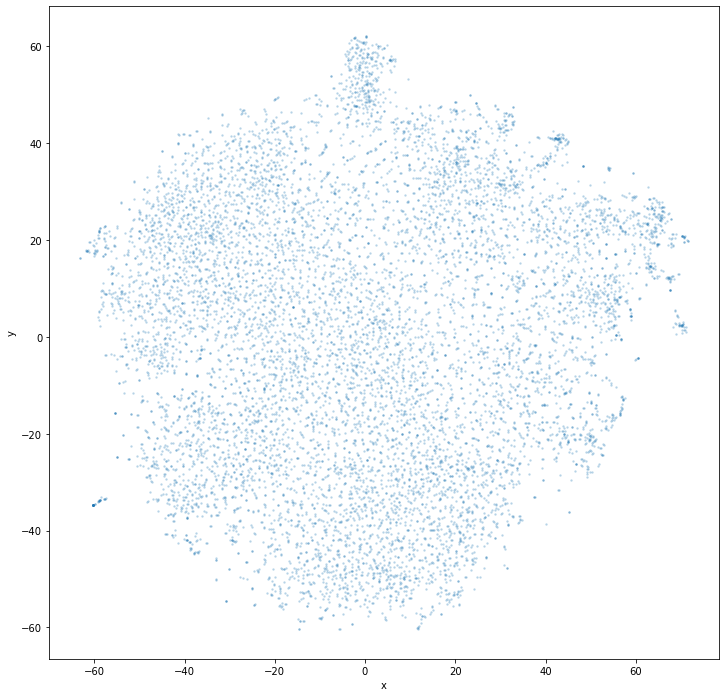

In [54]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12), 
                           marker='.', s=10, alpha=0.2)

In [55]:
output_notebook()

Loading BokehJS ...

In [56]:
subset_df = coords_df.sample(n=5000)

In [57]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [58]:
show(p)